In [4]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

In [5]:
from statsmodels.tsa.api import VAR

In [6]:
def calculate_correlation_df(agg_df):
    
    corr_df = agg_df.corr()
    corr_df = corr_df.round(3)
    
    rho = corr_df
    pval = agg_df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
    p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
    corr_p_df = rho.astype(str) + p
    return corr_p_df

In [7]:
data_directory = "data/output/"
file = "index_refinement_agg_daily.csv"

In [8]:
df = pd.read_csv(data_directory+file)

In [9]:
df["date"] = pd.to_datetime(df.date)
df = df.set_index("date")

In [10]:
index_df = df

In [412]:
w_df = pd.read_csv(data_directory+file_2)
d_df = pd.read_csv(data_directory+file_3)

In [413]:
w_df["date"] = pd.to_datetime(w_df["date"])
d_df["date"] = pd.to_datetime(d_df["date"])

In [414]:
w_df = w_df.set_index("date")
d_df = d_df.set_index("date")

In [415]:
def year(x):
    
    return x.year

def month(x):
    
    return x.month

year_series = pd.Series(w_df.index).apply(year)
month_series = pd.Series(w_df.index).apply(month)


In [416]:
w_df["year"] = list(year_series)
w_df["month"] = list(month_series)

In [417]:
w_m_df = w_df.groupby(["year","month"]).mean()

In [418]:
def year(x):
    
    return x.year

def month(x):
    
    return x.month

year_series = pd.Series(d_df.index).apply(year)
month_series = pd.Series(d_df.index).apply(month)


In [419]:
d_df["year"] = list(year_series)
d_df["month"] = list(month_series)

In [420]:
d_m_df = w_df.groupby(["year","month"]).mean()

In [421]:
w_m_df.index = df.index
d_m_df.index = df.index

In [422]:
w_m_df.columns = ["w_"+col for col in w_m_df.columns]
d_m_df.columns = ["d_"+col for col in d_m_df.columns]

In [423]:
merge_df = df.merge(w_m_df,left_index=True,right_index=True)
merge_df = merge_df.merge(d_m_df,left_index=True,right_index=True)

In [424]:
calculate_correlation_df(merge_df)

,economy,reform,regulation,intervention,w_economy,w_reform,w_regulation,w_intervention,d_economy,d_reform,d_regulation,d_intervention
economy,1.0***,0.466***,-0.025,0.021,0.849***,0.479***,0.075,-0.0,0.849***,0.479***,0.075,-0.0
reform,0.466***,1.0***,0.476***,0.13,0.372***,0.886***,0.388***,0.168,0.372***,0.886***,0.388***,0.168
regulation,-0.025,0.476***,1.0***,0.392***,-0.041,0.371***,0.76***,0.37***,-0.041,0.371***,0.76***,0.37***
intervention,0.021,0.13,0.392***,1.0***,-0.012,0.051,0.309**,0.806***,-0.012,0.051,0.309**,0.806***
w_economy,0.849***,0.372***,-0.041,-0.012,1.0***,0.403***,-0.002,-0.01,1.0***,0.403***,-0.002,-0.01
w_reform,0.479***,0.886***,0.371***,0.051,0.403***,1.0***,0.443***,0.118,0.403***,1.0***,0.443***,0.118
w_regulation,0.075,0.388***,0.76***,0.309**,-0.002,0.443***,1.0***,0.257*,-0.002,0.443***,1.0***,0.257*
w_intervention,-0.0,0.168,0.37***,0.806***,-0.01,0.118,0.257*,1.0***,-0.01,0.118,0.257*,1.0***
d_economy,0.849***,0.372***,-0.041,-0.012,1.0***,0.403***,-0.002,-0.01,1.0***,0.403***,-0.002,-0.01
d_reform,0.479***,0.886***,0.371***,0.051,0.403***,1.0***,0.443***,0.118,0.403***,1.0***,0.443***,0.118


In [11]:
macro_directory = "data/macro_after_clean/"
macro_file_1 = "ppi_yoy.xls"
macro_file_2 = "m2_chain.xls"
macro_file_3 = "cpi_yoy.xls"
macro_file_4 = "money_multiplier.xls"
macro_file_5 = "new_employment.xls"
macro_file_6 = "pmi.xls"

In [32]:
series_list = []

In [54]:
macro_1 = pd.read_excel(macro_directory+macro_file_6)

In [55]:
macro_1["date"] = pd.to_datetime(macro_1["date"])
macro_1 = macro_1.set_index("date")

In [56]:
macro_1 = macro_1.iloc[:,0:1]

In [57]:
series_list.append(macro_1)

In [58]:
macro_df = pd.concat(series_list,axis=1)

In [59]:
macro_df = macro_df.dropna()

In [60]:
macro_df

,PPI,M2,CPI_yoy,m_multiplier,new_empolyment,PMI
date,,,,,,
2013-01-31,-1.64,0.018458,2.0305,3.920000,89.0,0.4
2013-02-28,-1.63,0.006523,3.2198,3.960000,102.0,0.1
2013-03-31,-1.92,0.037310,2.0696,4.080000,151.0,0.9
2013-04-30,-2.62,-0.003192,2.3861,4.110000,128.0,0.6
2013-05-31,-2.87,0.009314,2.0981,4.180000,132.0,0.8
...,...,...,...,...,...,...
2020-05-31,-3.70,0.003176,2.4000,6.803431,106.0,0.6
2020-06-30,-3.00,0.016553,2.5000,6.920000,104.0,0.9
2020-07-31,-2.40,-0.004445,2.7000,7.152263,107.0,1.1


In [61]:
merge_df = df.merge(macro_df,left_index=True,right_index=True)

In [63]:
merge_df.corr().round(2)

,economy,reform,intervention,reform_market,finance,intervention_spending,regulation,intervention_tax_cut,intervention_support,reform_innovation,PPI,M2,CPI_yoy,m_multiplier,new_empolyment,PMI
economy,1.00,0.31,0.43,0.01,0.06,-0.11,0.10,0.18,0.49,0.24,-0.19,-0.31,0.05,0.30,0.20,-0.06
reform,0.31,1.00,0.15,0.30,0.01,-0.01,0.29,0.24,0.01,0.73,-0.11,-0.18,-0.06,-0.13,0.07,-0.04
intervention,0.43,0.15,1.00,-0.15,0.55,0.19,0.15,0.73,0.82,0.07,-0.04,-0.02,0.14,0.16,0.20,0.17
reform_market,0.01,0.30,-0.15,1.00,-0.15,0.06,0.06,-0.10,-0.14,0.14,-0.04,0.08,-0.01,-0.13,0.05,-0.08
finance,0.06,0.01,0.55,-0.15,1.00,0.38,0.06,0.18,0.62,0.00,-0.08,0.32,0.11,0.14,0.06,0.25
intervention_spending,-0.11,-0.01,0.19,0.06,0.38,1.00,0.37,-0.08,0.28,-0.15,-0.05,0.17,0.30,0.15,-0.02,0.16
regulation,0.10,0.29,0.15,0.06,0.06,0.37,1.00,0.20,0.01,0.01,0.18,-0.26,-0.08,-0.00,-0.06,0.16
intervention_tax_cut,0.18,0.24,0.73,-0.10,0.18,-0.08,0.20,1.00,0.21,0.08,0.13,-0.06,-0.03,-0.08,-0.08,0.25
intervention_support,0.49,0.01,0.82,-0.14,0.62,0.28,0.01,0.21,1.00,0.04,-0.17,0.01,0.21,0.30,0.38,0.03
reform_innovation,0.24,0.73,0.07,0.14,0.00,-0.15,0.01,0.08,0.04,1.00,-0.17,-0.21,-0.14,-0.11,0.30,0.03


In [64]:
calculate_correlation_df(merge_df)

,economy,reform,intervention,reform_market,finance,intervention_spending,regulation,intervention_tax_cut,intervention_support,reform_innovation,PPI,M2,CPI_yoy,m_multiplier,new_empolyment,PMI
economy,1.0***,0.307*,0.432***,0.014,0.062,-0.112,0.101,0.179,0.49***,0.242,-0.191,-0.31*,0.046,0.295*,0.199,-0.056
reform,0.307*,1.0***,0.149,0.298*,0.012,-0.011,0.288*,0.235,0.014,0.733***,-0.106,-0.184,-0.06,-0.134,0.069,-0.039
intervention,0.432***,0.149,1.0***,-0.154,0.546***,0.191,0.149,0.735***,0.816***,0.067,-0.039,-0.017,0.139,0.162,0.204,0.173
reform_market,0.014,0.298*,-0.154,1.0***,-0.15,0.056,0.06,-0.101,-0.143,0.139,-0.038,0.08,-0.01,-0.134,0.048,-0.076
finance,0.062,0.012,0.546***,-0.15,1.0***,0.377**,0.063,0.179,0.621***,0.001,-0.079,0.317*,0.108,0.135,0.06,0.249
intervention_spending,-0.112,-0.011,0.191,0.056,0.377**,1.0***,0.371**,-0.078,0.276*,-0.152,-0.051,0.172,0.296*,0.149,-0.016,0.16
regulation,0.101,0.288*,0.149,0.06,0.063,0.371**,1.0***,0.202,0.014,0.008,0.177,-0.257,-0.083,-0.003,-0.057,0.155
intervention_tax_cut,0.179,0.235,0.735***,-0.101,0.179,-0.078,0.202,1.0***,0.21,0.079,0.127,-0.058,-0.026,-0.078,-0.084,0.246
intervention_support,0.49***,0.014,0.816***,-0.143,0.621***,0.276*,0.014,0.21,1.0***,0.04,-0.166,0.014,0.206,0.297*,0.376**,0.027
reform_innovation,0.242,0.733***,0.067,0.139,0.001,-0.152,0.008,0.079,0.04,1.0***,-0.172,-0.206,-0.144,-0.109,0.303*,0.031


In [75]:
merge_df.columns

Index(['economy', 'reform', 'intervention', 'reform_market', 'finance',
       'intervention_spending', 'regulation', 'intervention_tax_cut',
       'intervention_support', 'reform_innovation', 'PPI', 'M2', 'CPI_yoy',
       'm_multiplier', 'new_empolyment', 'PMI'],
      dtype='object')

In [76]:



columns = ["economy","PPI","M2","CPI_yoy","m_multiplier","new_empolyment","PMI"]
columns = ["economy","PPI","m_multiplier","new_empolyment"]

In [77]:
var_df = merge_df[columns]

In [78]:
model = VAR(var_df)

/Users/sunnyyang/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [79]:
results = model.fit(3)

In [80]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 27, Nov, 2020
Time:                     10:09:09
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    3.32479
Nobs:                     35.0000    HQIC:                   1.81168
Log likelihood:          -164.396    FPE:                    3.20014
AIC:                      1.01399    Det(Omega_mle):        0.904640
--------------------------------------------------------------------
Results for equation economy
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                    -2.641349         2.155584           -1.225           0.220
L1.economy               -0.446010         0.200259           -2.227           0.026
L1.PPI                   -0.096954        

In [ ]:
PPI, M MULTIPLIER, NEW EMPLOY

In [86]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA

In [126]:
series = merge_df["intervention"]

In [127]:
mod = ARMA(series, order=(3,0))

/Users/sunnyyang/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [128]:
mod = mod.fit()

In [129]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           intervention   No. Observations:                   38
Model:                     ARMA(3, 0)   Log Likelihood                 -41.158
Method:                       css-mle   S.D. of innovations              0.714
Date:                Fri, 27 Nov 2020   AIC                             92.317
Time:                        10:54:39   BIC                            100.505
Sample:                             0   HQIC                            95.230
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5061      0.090      5.646      0.000       0.330       0.682
ar.L1.intervention    -0.1528      0.162     -0.943      0.346      -0.470       0.165
ar.L2.intervention    -0.1412      0.161     -0.876      0.381      -0.457       0.175
ar.L3.intervention    -0.0141      0.161     -0.088      0.930      -0.330       0.302
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.1801           -2.7050j            2.7110           -0.2606
AR.2           -0.1801           +2.7050j            2.7110            0.2606
AR.3           -9.6353           -0.0000j            9.6353           -0.5000
-----------------------------------------------------------------------------
"""

In [130]:
from statsmodels.graphics.tsaplots import plot_acf

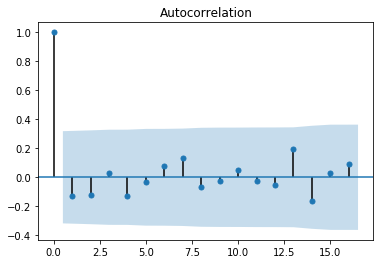

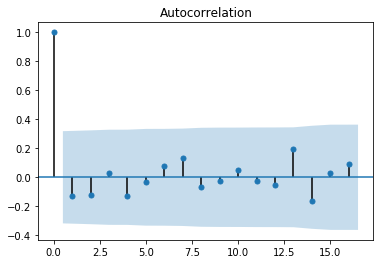

In [131]:
plot_acf(series)